# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

<Figure size 576x576 with 0 Axes>

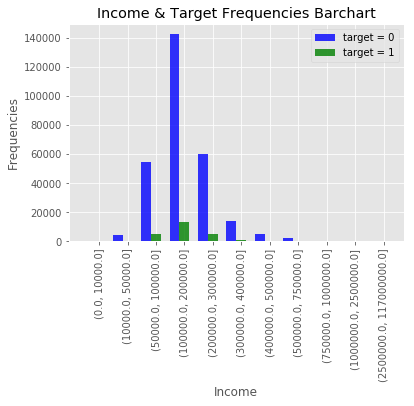

In [48]:
# 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
income_max = app_train['AMT_INCOME_TOTAL'].max()
cut_rule = [0, 10000, 50000, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 2500000, income_max]

# target = 0
target_0 = app_train.loc[app_train['TARGET'] == 0, 'AMT_INCOME_TOTAL']
target_0_grp = pd.cut(target_0, bins=cut_rule, include_lowest=False)
grp_0 = target_0_grp.value_counts().rename_axis('income').reset_index(name='t0_frequency')
grp_0_sort = grp_0.sort_values(by='income', ascending=True)

# target = 1
target_1 = app_train.loc[app_train['TARGET'] == 1, 'AMT_INCOME_TOTAL']
target_1_grp = pd.cut(target_1, bins=cut_rule, include_lowest=False)
grp_1 = target_1_grp.value_counts().rename_axis('income').reset_index(name='t1_frequency')
grp_1_sort = grp_1.sort_values(by='income', ascending=True)

# 繪製上述的 "離散化標籤"('AMT_INCOME_TOTAL') 與目標值 ('TARGET') 的長條圖
df = pd.merge(grp_0_sort, grp_1_sort, how='left', on='income')

plt.figure(figsize = (8, 8))
plt.style.use('ggplot')

fig, ax = plt.subplots()
index = np.arange(11)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df['t0_frequency'], bar_width,
alpha=opacity,
color='b',
label='target = 0')

rects2 = plt.bar(index + bar_width, df['t1_frequency'], bar_width,
alpha=opacity,
color='g',
label='target = 1')

plt.xlabel('Income')
plt.ylabel('Frequencies')
plt.title('Income & Target Frequencies Barchart')
plt.xticks(index + bar_width, df['income'], rotation=90)
plt.legend()

plt.show()
# target = 0 (有償債困難的客戶) 多數聚集在薪水在(100,000至200,000]此區間中
# 再深入此區間詳細查看

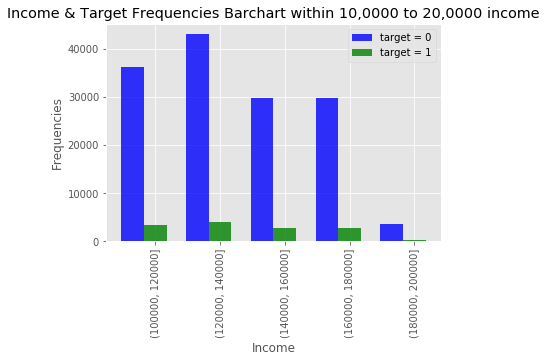

In [52]:
# 延續上述的步驟再進行一次
new_grp = app_train.loc[(app_train['AMT_INCOME_TOTAL'] > 100000.0) & (app_train['AMT_INCOME_TOTAL'] <= 200000.0), ['TARGET', 'AMT_INCOME_TOTAL']]
new_grp_0 = new_grp.loc[(new_grp['TARGET'] == 0)] 
new_grp_1 = new_grp.loc[(new_grp['TARGET'] == 1)] 

cut_rule = [100000, 120000, 140000, 160000, 180000, 200000]

target_0_grp = pd.cut(new_grp_0['AMT_INCOME_TOTAL'], bins=cut_rule, include_lowest=False)
target_0_grp_cnt = target_0_grp.value_counts().rename_axis('income').reset_index(name='t0_frequency')
target_0_grp_cnt_sort = target_0_grp_cnt.sort_values(by='income', ascending=True)

target_1_grp = pd.cut(new_grp_1['AMT_INCOME_TOTAL'], bins=cut_rule, include_lowest=False)
target_1_grp_cnt = target_1_grp.value_counts().rename_axis('income').reset_index(name='t1_frequency')
target_1_grp_cnt_sort = target_1_grp_cnt.sort_values(by='income', ascending=True)

df2 = pd.merge(target_0_grp_cnt_sort, target_1_grp_cnt_sort, how='left', on='income')

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35
opacity = 0.8

rects3 = plt.bar(index, df2['t0_frequency'], bar_width,
alpha=opacity,
color='b',
label='target = 0')

rects4 = plt.bar(index + bar_width, df2['t1_frequency'], bar_width,
alpha=opacity,
color='g',
label='target = 1')

plt.xlabel('Income')
plt.ylabel('Frequencies')
plt.title('Income & Target Frequencies Barchart between 10,0000 to 20,0000 income')
plt.xticks(index + bar_width, df2['income'], rotation=90)
plt.legend()

plt.show()
# 在區間(120,000至140,000]中聚集最多有償債困難的客戶，在區間(180,000至200,000]則相對最少